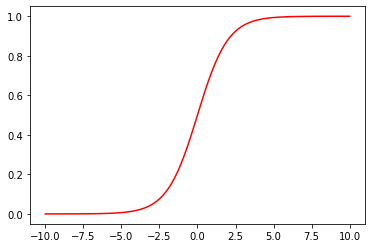

In [47]:
import numpy as np
from matplotlib import pyplot as plt  

var = np.linspace(-10, 10, 100)

def sigmoid(x):  
    return 1/(1+np.exp(-x))

plt.plot(var, sigmoid(var), c="r")   

In [9]:
feature_set = np.array([[0,1,0],[0,0,1],[1,0,0],[1,1,0],[1,1,1]])  
labels = np.array([[1,0,0,1,1]])  

In [10]:
print(labels, labels.shape)

[[1 0 0 1 1]] (1, 5)


In [11]:
labels = labels.reshape(5,1) 

In [12]:
labels

array([[1],
       [0],
       [0],
       [1],
       [1]])

In [13]:
np.random.seed(42)  
weights = np.random.rand(3,1)  
bias = np.random.rand(1)  
lr = 0.05  

In [14]:
print(weights, bias)

[[0.37454012]
 [0.95071431]
 [0.73199394]] [0.59865848]


In [17]:
def sigmoid(x):  
    return 1/(1+np.exp(-x))
def sigmoid_der(x):  
    return sigmoid(x)*(1-sigmoid(x))

In [25]:
collector = []
for epoch in range(20000):  
    inputs = feature_set

    # feedforward step1
    XW = np.dot(feature_set, weights) + bias
    #feedforward step2
    z = sigmoid(XW)
    
    # backpropagation step 1
    error = z - labels
    collector.append(error.sum())
    # print(error.sum())
    
    # backpropagation step 2
    dpred_dz = sigmoid_der(z)
    z_delta = error * dpred_dz

    inputs = feature_set.T
    weights -= lr * np.dot(inputs, z_delta)

    for num in z_delta:
        bias -= lr * num

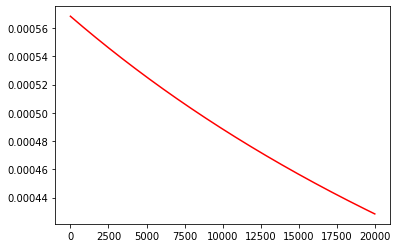

In [26]:
plt.plot(collector, c="r")   
plt.show()

In [27]:
single_point = np.array([1,0,0])  # Smoking 1, Obesity 0, Exercise 0 
result = sigmoid(np.dot(single_point, weights) + bias)  
print(result) 

[0.00175443]


## This part is for Usage of Libraries

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy
import pandas as pd


In [33]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
class_name = data.target_names
feature_name = data.feature_names

In [34]:
print(class_name, feature_name, "\nData Sample", X[0], "\nLabel", y)

['setosa' 'versicolor' 'virginica'] ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
Data Sample [5.1 3.5 1.4 0.2] 
Label [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## To understand the distribution of data

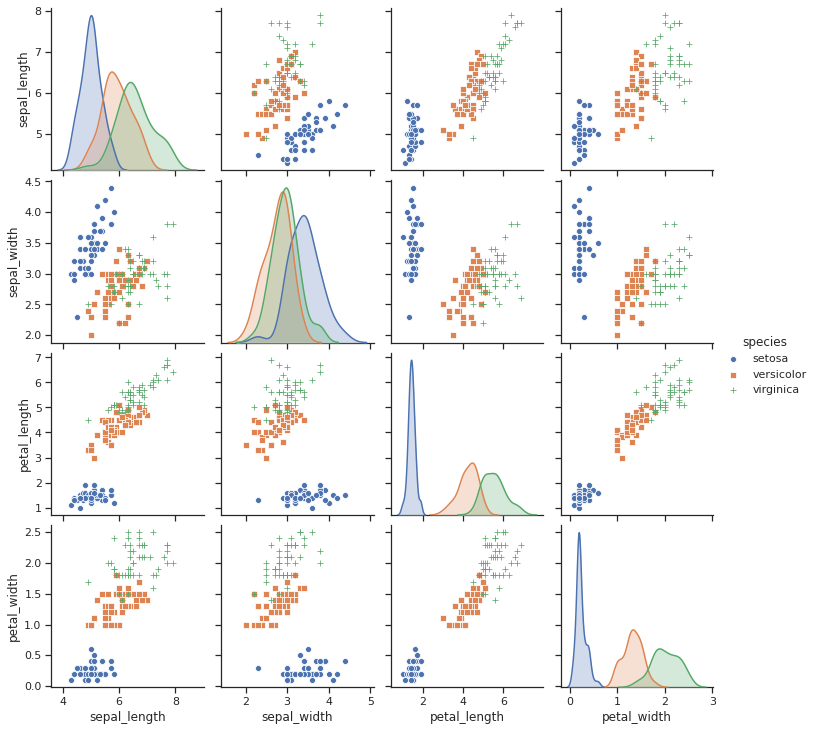

In [82]:
import seaborn as sns
sns.set(style="ticks")
df = sns.load_dataset("iris")
# http://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(df, hue='species', markers=["o", "s", "+"])

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [38]:
print(X_train[0], X_train.shape, X_test.shape, y_train.shape, y_test.shape)

[4.6 3.6 1.  0.2] (120, 4) (30, 4) (120,) (30,)


In [39]:
# Encoding training dataset
encoding_train_y = np_utils.to_categorical(y_train)

# Encoding training dataset
encoding_test_y = np_utils.to_categorical(y_test)


In [40]:
# Creating a model
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))


# Compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Training a model
model.fit(X_train, encoding_train_y, epochs=300, batch_size=10)


Epoch 1/300
12/12 [==============================] - 0s 4ms/step - loss: 1.8665 - accuracy: 0.3417
Epoch 2/300
12/12 [==============================] - 0s 2ms/step - loss: 1.5488 - accuracy: 0.2250
Epoch 3/300
12/12 [==============================] - 0s 1ms/step - loss: 1.3460 - accuracy: 0.0167
Epoch 4/300
12/12 [==============================] - 0s 803us/step - loss: 1.2471 - accuracy: 0.0750
Epoch 5/300
12/12 [==============================] - 0s 677us/step - loss: 1.1820 - accuracy: 0.1167
Epoch 6/300
12/12 [==============================] - 0s 542us/step - loss: 1.1383 - accuracy: 0.1417
Epoch 7/300
12/12 [==============================] - 0s 778us/step - loss: 1.1051 - accuracy: 0.1083
Epoch 8/300
12/12 [==============================] - 0s 632us/step - loss: 1.0884 - accuracy: 0.1833
Epoch 9/300
12/12 [==============================] - 0s 789us/step - loss: 1.0746 - accuracy: 0.3083
Epoch 10/300
12/12 [==============================] - 0s 855us/step - loss: 1.0610 - accuracy: 0.

12/12 [==============================] - 0s 757us/step - loss: 0.1371 - accuracy: 0.9667
Epoch 82/300
12/12 [==============================] - 0s 559us/step - loss: 0.1307 - accuracy: 0.9667
Epoch 83/300
12/12 [==============================] - ETA: 0s - loss: 0.1734 - accuracy: 1.00 - 0s 915us/step - loss: 0.1339 - accuracy: 0.9750
Epoch 84/300
12/12 [==============================] - 0s 654us/step - loss: 0.1316 - accuracy: 0.9667
Epoch 85/300
12/12 [==============================] - 0s 530us/step - loss: 0.1296 - accuracy: 0.9667
Epoch 86/300
12/12 [==============================] - 0s 626us/step - loss: 0.1247 - accuracy: 0.9833
Epoch 87/300
12/12 [==============================] - 0s 558us/step - loss: 0.1316 - accuracy: 0.9667
Epoch 88/300
12/12 [==============================] - 0s 657us/step - loss: 0.1216 - accuracy: 0.9667
Epoch 89/300
12/12 [==============================] - 0s 536us/step - loss: 0.1303 - accuracy: 0.9583
Epoch 90/300
12/12 [==============================] -

12/12 [==============================] - 0s 1ms/step - loss: 0.0844 - accuracy: 0.9917
Epoch 161/300
12/12 [==============================] - 0s 552us/step - loss: 0.0849 - accuracy: 0.9833
Epoch 162/300
12/12 [==============================] - 0s 1ms/step - loss: 0.0828 - accuracy: 0.9833
Epoch 163/300
12/12 [==============================] - 0s 692us/step - loss: 0.0834 - accuracy: 0.9833
Epoch 164/300
12/12 [==============================] - 0s 616us/step - loss: 0.0852 - accuracy: 0.9750
Epoch 165/300
12/12 [==============================] - 0s 508us/step - loss: 0.0793 - accuracy: 0.9833
Epoch 166/300
12/12 [==============================] - 0s 569us/step - loss: 0.0882 - accuracy: 0.9583
Epoch 167/300
12/12 [==============================] - 0s 541us/step - loss: 0.0872 - accuracy: 0.9750
Epoch 168/300
12/12 [==============================] - 0s 547us/step - loss: 0.0822 - accuracy: 0.9750
Epoch 169/300
12/12 [==============================] - 0s 566us/step - loss: 0.0837 - accur

12/12 [==============================] - 0s 639us/step - loss: 0.0703 - accuracy: 0.9750
Epoch 240/300
12/12 [==============================] - 0s 548us/step - loss: 0.0789 - accuracy: 0.9667
Epoch 241/300
12/12 [==============================] - 0s 526us/step - loss: 0.0711 - accuracy: 0.9750
Epoch 242/300
12/12 [==============================] - 0s 781us/step - loss: 0.0776 - accuracy: 0.9667
Epoch 243/300
12/12 [==============================] - 0s 528us/step - loss: 0.0713 - accuracy: 0.9833
Epoch 244/300
12/12 [==============================] - 0s 773us/step - loss: 0.0729 - accuracy: 0.9833
Epoch 245/300
12/12 [==============================] - 0s 548us/step - loss: 0.0751 - accuracy: 0.9750
Epoch 246/300
12/12 [==============================] - 0s 618us/step - loss: 0.0698 - accuracy: 0.9833
Epoch 247/300
12/12 [==============================] - 0s 597us/step - loss: 0.0715 - accuracy: 0.9833
Epoch 248/300
12/12 [==============================] - 0s 610us/step - loss: 0.0735 - a

In [41]:
# Evaluate the model
scores = model.evaluate(X_test, encoding_test_y)
print("\nAccuracy: %.2f%%" % (scores[1]*100))


1/1 [==============================] - 0s 594us/step - loss: 0.0547 - accuracy: 1.0000

Accuracy: 100.00%


In [71]:
print("[sepallength, sepalwidth, petallength, petalwidth\nsetosa versicolor virginica\n", np.concatenate((X_test, encoding_test_y), axis=1))
#X_test

[sepallength, sepalwidth, petallength, petalwidth
setosa versicolor virginica
 [[6.1 2.8 4.7 1.2 0.  1.  0. ]
 [5.7 3.8 1.7 0.3 1.  0.  0. ]
 [7.7 2.6 6.9 2.3 0.  0.  1. ]
 [6.  2.9 4.5 1.5 0.  1.  0. ]
 [6.8 2.8 4.8 1.4 0.  1.  0. ]
 [5.4 3.4 1.5 0.4 1.  0.  0. ]
 [5.6 2.9 3.6 1.3 0.  1.  0. ]
 [6.9 3.1 5.1 2.3 0.  0.  1. ]
 [6.2 2.2 4.5 1.5 0.  1.  0. ]
 [5.8 2.7 3.9 1.2 0.  1.  0. ]
 [6.5 3.2 5.1 2.  0.  0.  1. ]
 [4.8 3.  1.4 0.1 1.  0.  0. ]
 [5.5 3.5 1.3 0.2 1.  0.  0. ]
 [4.9 3.1 1.5 0.1 1.  0.  0. ]
 [5.1 3.8 1.5 0.3 1.  0.  0. ]
 [6.3 3.3 4.7 1.6 0.  1.  0. ]
 [6.5 3.  5.8 2.2 0.  0.  1. ]
 [5.6 2.5 3.9 1.1 0.  1.  0. ]
 [5.7 2.8 4.5 1.3 0.  1.  0. ]
 [6.4 2.8 5.6 2.2 0.  0.  1. ]
 [4.7 3.2 1.6 0.2 1.  0.  0. ]
 [6.1 3.  4.9 1.8 0.  0.  1. ]
 [5.  3.4 1.6 0.4 1.  0.  0. ]
 [6.4 2.8 5.6 2.1 0.  0.  1. ]
 [7.9 3.8 6.4 2.  0.  0.  1. ]
 [6.7 3.  5.2 2.3 0.  0.  1. ]
 [6.7 2.5 5.8 1.8 0.  0.  1. ]
 [6.8 3.2 5.9 2.3 0.  0.  1. ]
 [4.8 3.  1.4 0.3 1.  0.  0. ]
 [4.8 3.1 1.6 0.2 1.  

In [73]:
# Create a data for fun
# ['sepal length ( 2 cm)', 'sepal width (2 cm)', 'petal length ( 1 cm)', 'petal width (1 cm)']
dummy_data = np.array([[1, 10, 1, 1]])
dummy_data

model.predict(dummy_data)

array([[9.9917883e-01, 8.2120782e-04, 4.0304154e-16]], dtype=float32)

In [74]:
np.argmax(model.predict(dummy_data), axis=None, out=None)

0

In [75]:
# [6.8 3.2 5.9 2.3 0.  0.  1. ]
np.argmax(model.predict(np.array([[6.5, 3.1, 5.7, 2]])), axis=None, out=None)

2

In [83]:
# [5.6 2.5 3.9 1.1 0.  1.  0. ]
np.argmax(model.predict(np.array([[5, 3, 4, 1]])), axis=None, out=None)

1